In [17]:
import numpy as np
import matplotlib.pyplot as plt

# **PART 1**

In [18]:
## DEFINE f(x)
def f(x):
  return 1/( 1 + 25*(x**2) )

In [19]:
## Construct data set: N = 2^3
N1 = 2**3
x1 = np.linspace(-1, 1, N1) # uniform x
y1 = f(x1) # construct RHS vector
V1 = np.vander(x1, N1) # construct Vandermonde matrix 
V1_det = np.linalg.det(V1) # determinant of V1
print('det(V1): ', V1_det)
a1 = np.linalg.solve(V1, y1) # compute the coefficients

## Construct data set: N = 2^4
N2 = 2**4
x2 = np.linspace(-1, 1, N2) # uniform x
y2 = f(x2) # construct RHS vector
V2 = np.vander(x2, N2) # construct Vandermonde matrix
V2_det = np.linalg.det(V2) # determinant of V2
print('det(V2): ', V2_det)
a2 = np.linalg.solve(V2, y2) # compute the coefficients

## Construct data set: N = 2^5
N3 = 2**5
x3 = np.linspace(-1, 1, N3) # uniform x
y3 = f(x3) # construct RHS vector
V3 = np.vander(x3, N3) # construct Vandermonde matrix 
V3_det = np.linalg.det(V3) # determinant of V3
print('det(V3): ', V3_det)
a3 = np.linalg.solve(V3, y3) # compute the coefficients

det(V1):  7.318659209489978e-05
det(V2):  8.886130983949562e-29
det(V3):  1.8522942475379536e-141


In [20]:
# CONSTRUCT TRUE FUNCTION FOR PLOTTING
xx = np.linspace(-1, 1, 100)
yy = f(xx)

# CONSTRUCT POLYNOMIAL INTERPOLANT TO PLOT AGAINST TRUE FUNCTION
V11 = np.vander(xx, N1)
f1 = np.dot(V11, a1)

V22 = np.vander(xx, N2)
f2 = np.dot(V22, a2)

V33 = np.vander(xx, N3)
f3 = np.dot(V33, a3)

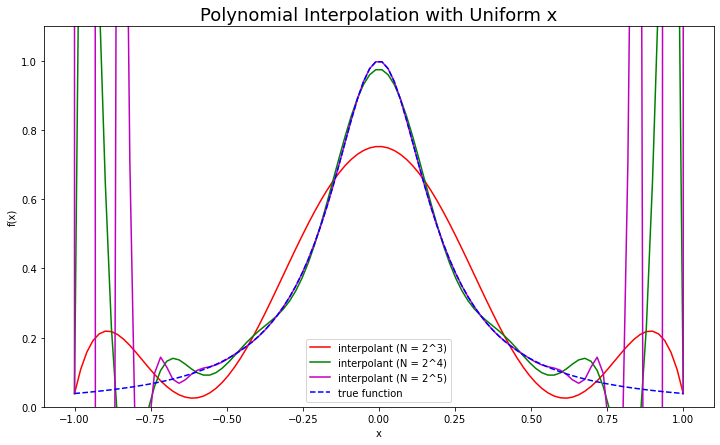

In [21]:
# PLOT
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)

plt.plot(xx, f1, 'r-', label='interpolant (N = 2^3)')

plt.plot(xx, f2, 'g-', label='interpolant (N = 2^4)')

plt.plot(xx, f3, 'm-', label='interpolant (N = 2^5)')

plt.plot(xx, yy, 'b--', label='true function')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Interpolation with Uniform x', size = 18)
plt.legend()
plt.ylim(0, 1.1)


plt.show()

In [22]:
# DEFINE CHEBYSHEV
def x_Chebyshev(N):
  x = np.zeros(N)
  for j in range(0, N):
    x[j] = np.cos( np.pi * (2*(j+1) - 1)/(2*N) )
  return x

In [23]:
## Construct data set: N = 2^3
x1c = x_Chebyshev(N1) # Chebyshev x
y1c = f(x1c) # construct RHS vector
V1c = np.vander(x1c, N1) # construct Vandermonde matrix 
V1c_det = np.linalg.det(V1c) # determinant of V1
print('det(V1): ', V1c_det)
a1 = np.linalg.solve(V1c, y1c) # compute the coefficients

## Construct data set: N = 2^4
x2c = x_Chebyshev(N2) # Chebyshev x
y2c = f(x2c) # construct RHS vector
V2c = np.vander(x2c, N2) # construct Vandermonde matrix
V2c_det = np.linalg.det(V2c) # determinant of V2
print('det(V2): ', V2c_det)
a2 = np.linalg.solve(V2c, y2c) # compute the coefficients

## Construct data set: N = 2^5
x3c = x_Chebyshev(N3) # Chebyshev x
y3c = f(x3c) # construct RHS vector
V3c = np.vander(x3c, N3) # construct Vandermonde matrix 
V3c_det = np.linalg.det(V3c) # determinant of V3
print('det(V3): ', V3c_det)
a3 = np.linalg.solve(V3c, y3c) # compute the coefficients

det(V1):  0.00017263349150062224
det(V2):  5.849050204021296e-25
det(V3):  2.7383363155558553e-121


In [24]:
# CONSTRUCT POLYNOMIAL INTERPOLANT TO PLOT AGAINST TRUE FUNCTION
f1 = np.dot(V11, a1)

f2 = np.dot(V22, a2)

f3 = np.dot(V33, a3)

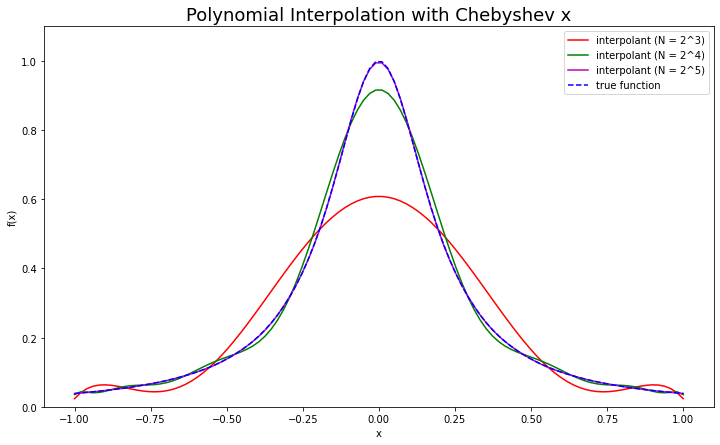

In [25]:
# PLOT
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)

plt.plot(xx, f1, 'r-', label='interpolant (N = 2^3)')

plt.plot(xx, f2, 'g-', label='interpolant (N = 2^4)')

plt.plot(xx, f3, 'm-', label='interpolant (N = 2^5)')

plt.plot(xx, yy, 'b--', label='true function')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Interpolation with Chebyshev x', size = 18)
plt.legend()
plt.ylim(0, 1.1)


plt.show()

# **PART II**

In [26]:
# DEFINE TRIGONOMETRIC POLYNOMIAL
def Trig_poly(x, N, K):
  T = np.zeros([N, K])
  for j in range (0, N): # j-th row
    for k in range (0, K): # k-th column
      if k in range (0, int(K/2)):
        T[j, k] = np.cos( k*np.pi*x[j] )
      if k in range (int(K/2), K):
        T[j, k] = np.sin( (k - K/2 + 1)*np.pi*x[j] )
  return T

In [27]:
# UNIFORM x_j's

## Construct data set: N = 2^3
T1 = Trig_poly(x1, N1, N1) # construct Trigonometric matrix 
T1_det = np.linalg.det(T1) # determinant of V1
print('det(T1): ', T1_det)
T_a1 = np.linalg.solve(T1, y1) # compute the coefficients

## Construct data set: N = 2^4
T2 = Trig_poly(x2, N2, N2) # construct Trigonometric matrix 
T2_det = np.linalg.det(T2) # determinant of V1
print('det(T2): ', T2_det)
T_a2 = np.linalg.solve(T2, y2) # compute the coefficients

## Construct data set: N = 2^5
T3 = Trig_poly(x3, N3, N3) # construct Trigonometric matrix 
T3_det = np.linalg.det(T3) # determinant of V1
print('det(T3): ', T3_det)
T_a3 = np.linalg.solve(T3, y3) # compute the coefficients

det(T1):  1.9448765523797064e-13
det(T2):  1.89935690391166e-08
det(T3):  58603.23364423598


In [28]:
# CONSTRUCT TRIGONOMETRIC INTERPOLANT TO PLOT AGAINST TRUE FUNCTION
T11 = Trig_poly(xx, 100, N1)
f1 = np.dot(T11, T_a1)

T22 = Trig_poly(xx, 100, N2)
f2 = np.dot(T22, T_a2)

T33 = Trig_poly(xx, 100, N3)
f3 = np.dot(T33, T_a3)

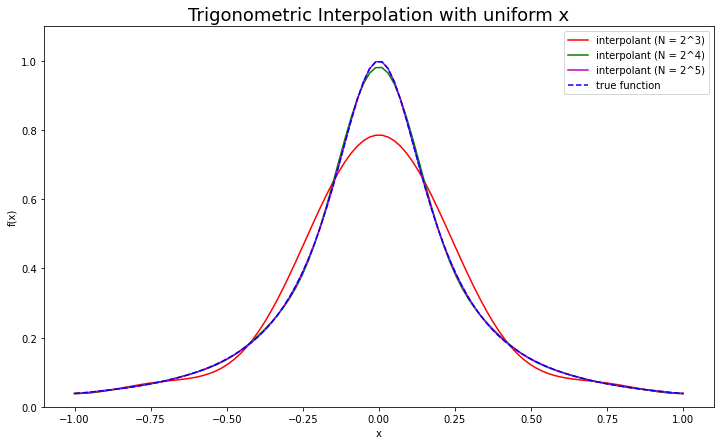

In [29]:
# PLOT
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)

plt.plot(xx, f1, 'r-', label='interpolant (N = 2^3)')

plt.plot(xx, f2, 'g-', label='interpolant (N = 2^4)')

plt.plot(xx, f3, 'm-', label='interpolant (N = 2^5)')

plt.plot(xx, yy, 'b--', label='true function')


plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trigonometric Interpolation with uniform x', size = 18)
plt.legend()
plt.ylim(0, 1.1)


plt.show()

In [30]:
# CHEBYSHEV x's

## Construct data set: N = 2^3
T1c = Trig_poly(x1c, N1, N1) # construct Trigonometric matrix 
T1c_det = np.linalg.det(T1c) # determinant of T1c
print('det(T1): ', T1c_det)
T_a1c = np.linalg.solve(T1c, y1c) # compute the coefficients

## Construct data set: N = 2^4
T2c = Trig_poly(x2c, N2, N2) # construct Trigonometric matrix 
T2c_det = np.linalg.det(T2c) # determinant of T2c
print('det(T2): ', T2c_det)
T_a2c = np.linalg.solve(T2c, y2c) # compute the coefficients

## Construct data set: N = 2^5
T3c = Trig_poly(x3c, N3, N3) # construct Trigonometric matrix 
T3c_det = np.linalg.det(T3c) # determinant of T3c
print('det(T3): ', T3c_det)
T_a3c = np.linalg.solve(T3c, y3c) # compute the coefficients

det(T1):  7.642790390874888
det(T2):  0.40454213477299816
det(T3):  2.7460656336067218e-14


In [31]:
# CONSTRUCT TRIGONOMETRIC INTERPOLANT TO PLOT AGAINST TRUE FUNCTION 
f1 = np.dot(T11, T_a1c)

f2 = np.dot(T22, T_a2c)

f3 = np.dot(T33, T_a3c)

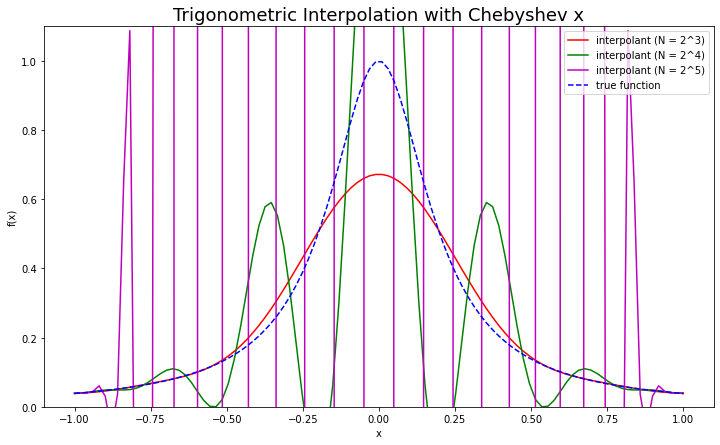

In [32]:
# PLOT
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)

plt.plot(xx, f1, 'r-', label='interpolant (N = 2^3)')

plt.plot(xx, f2, 'g-', label='interpolant (N = 2^4)')

plt.plot(xx, f3, 'm-', label='interpolant (N = 2^5)')

plt.plot(xx, yy, 'b--', label='true function')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trigonometric Interpolation with Chebyshev x', size = 18)
plt.legend()
plt.ylim(0, 1.1)

plt.show()